In this notebook we will practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the selected algorithms, and find the best one by using accuracy evaluation methods.


## 1. Import Libraries

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## 2. Upload Data

In [247]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


--2020-11-22 22:25:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2020-11-22 22:25:03 (14.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [248]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [249]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB
None


## 3. Format Data

### 3.1 Fix the date formating from object to date 

In [250]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


## 4. Data Exploration

In [251]:
df["loan_status"].value_counts(normalize="True")

PAIDOFF       0.751445
COLLECTION    0.248555
Name: loan_status, dtype: float64

In [252]:
df.groupby(["Gender"])["loan_status"].value_counts(normalize='True')

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [253]:
df.groupby(["education"])["loan_status"].value_counts(normalize='True')

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

## 5. Data Pre-Processing                                                         

In [254]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='male' else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


In [255]:
Feature = df[['Principal','terms','age','Gender','weekend','education']]
Feature = pd.get_dummies(Feature)
Feature.head()

,Principal,terms,age,Gender,weekend,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,1,0,0,1,0,0
1,1000,30,33,0,0,1,0,0,0
2,1000,15,27,1,0,0,0,0,1
3,1000,30,28,0,1,0,0,0,1
4,1000,30,29,1,1,0,0,0,1


In [256]:
Feature.columns=['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bechalor',
       'High School or Below', 'Master or Above',
       'college']

### Feature Set (X)

In [257]:
X=Feature.values
X[0:5]

array([[1000,   30,   45,    1,    0,    0,    1,    0,    0],
       [1000,   30,   33,    0,    0,    1,    0,    0,    0],
       [1000,   15,   27,    1,    0,    0,    0,    0,    1],
       [1000,   30,   28,    0,    1,    0,    0,    0,    1],
       [1000,   30,   29,    1,    1,    0,    0,    0,    1]])

### Label Set (y)

In [258]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## 6. Normalize Data

In [259]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###  Train Test Split

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


## 7. K Nearest Neighbour Model

### Import Packages

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Training

In [263]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

### Predicting

In [264]:
yhat_KNN = knn_model.predict(X_test)
yhat_KNN[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

### Accuracy Evaluation

In [265]:
Train_set_Accuracy = metrics.accuracy_score(y_train, knn_model.predict(X_train))
Test_set_Accuracy =  metrics.accuracy_score(y_test, yhat_KNN)
print("Train_set_Accuracy is:", Train_set_Accuracy)
print("Test_set_Accuracy is:", Test_set_Accuracy)

Train_set_Accuracy is: 0.8333333333333334
Test_set_Accuracy is: 0.6857142857142857


In [266]:
# Cerate a dictionary to save the metrics
metrics_summary={}

### Other k Values

In [267]:
matrix=np.zeros(10)
for i in range(1,10):
    knn_model2 = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat_KNN2=knn_model2.predict(X_test)
    score=metrics.accuracy_score(y_test, yhat_KNN2)
    matrix[i]=score
matrix

array([0.        , 0.68571429, 0.67142857, 0.71428571, 0.68571429,
       0.71428571, 0.67142857, 0.71428571, 0.68571429, 0.72857143])

In [268]:
print("Best accuracy is", matrix.max(), "with the k value",matrix.argmax()+1)

Best accuracy is 0.7285714285714285 with the k value 10


In [269]:
metrics_summary["KNN-Accuracy score"]=matrix.max()
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285}

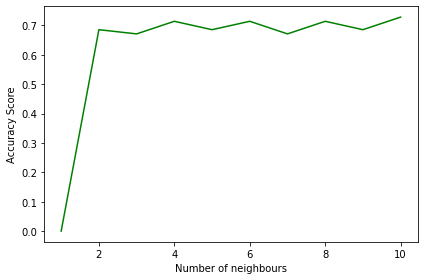

In [270]:
plt.plot(range(1,11),matrix,'g')
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.show()

In [271]:
KNN_f1_score = metrics.f1_score(y_test,yhat_KNN2,average='weighted')
metrics_summary["KNN-F1 score"]=KNN_F1_score

In [272]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285, 'KNN-F1 score': 0.6891534391534392}

### Jaccard Index

In [273]:
from sklearn.metrics import jaccard_score
KNN_jaccard_score=jaccard_score(y_test,yhat_KNN,average='weighted')
metrics_summary["KNN-Jaccard score"]=KNN_jaccard_score

In [274]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306}


## 8. Decision Tree

In [275]:
# Decision Tree will have Jaccard and F1 Score

In [276]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train, y_train)

yhat_DT=dt_model.predict(X_test)

In [277]:
print (yhat_DT[0:5])
print (y_test[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


### 8.1. Model Evaluation

In [278]:
from sklearn import metrics
dt_accuracy=metrics.accuracy_score(y_test,yhat_DT)
print("Decision Tree's accuracy for test set is:", dt_accuracy )
metrics_summary["DecisionTree-Accuracy score"]=dt_accuracy


Decision Tree's accuracy for test set is: 0.7285714285714285


In [279]:
from sklearn.metrics import f1_score
DT_f1_score=f1_score(y_test, yhat_DT, average='weighted')
metrics_summary["DT-F1 Score"]=DT_F1_score

In [280]:
from sklearn.metrics import jaccard_score
DT_jaccard_score=jaccard_score(y_test, yhat_DT,average='weighted')
metrics_summary["DT-Jaccard Score"]=DT_Jaccard_score

In [281]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306,
 'DecisionTree-Accuracy score': 0.7285714285714285,
 'DT-F1 Score': 0.63357948794842,
 'DT-Jaccard Score': 0.4905673963133641}

## 9. SVM

In [282]:
# SVM will have Jaccard and F1 Score

In [283]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [284]:
yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [285]:
from sklearn.metrics import f1_score
SVM_f1_score=f1_score(y_test, yhat_SVM, average='weighted')
metrics_summary["SVM-F1 Score"]=SVM_F1_score

In [286]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306,
 'DecisionTree-Accuracy score': 0.7285714285714285,
 'DT-F1 Score': 0.63357948794842,
 'DT-Jaccard Score': 0.4905673963133641,
 'SVM-F1 Score': 0.6203971467129362}

In [287]:
from sklearn.metrics import jaccard_score
SVM_jaccard_score=jaccard_score(y_test, yhat_SVM,average='weighted')
metrics_summary["SVM-Jaccard Score"]=SVM_Jaccard_score

In [288]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306,
 'DecisionTree-Accuracy score': 0.7285714285714285,
 'DT-F1 Score': 0.63357948794842,
 'DT-Jaccard Score': 0.4905673963133641,
 'SVM-F1 Score': 0.6203971467129362,
 'SVM-Jaccard Score': 0.5070028011204482}

## 10. Logistic Regression

In [289]:
# logistic regression will have Jaccard, F1 Score and Logloss

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
yhat_LR=logreg.predict(X_test)
yhat_LRproba=logreg.predict_proba(X_test)

### Metrics-Jaccard Index

In [292]:
from sklearn.metrics import jaccard_score
LR_jaccard_score=jaccard_score(y_test, yhat_LR,average='weighted')
metrics_summary["LR-Jaccard Score"]=LR_Jaccard_score

In [293]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306,
 'DecisionTree-Accuracy score': 0.7285714285714285,
 'DT-F1 Score': 0.63357948794842,
 'DT-Jaccard Score': 0.4905673963133641,
 'SVM-F1 Score': 0.6203971467129362,
 'SVM-Jaccard Score': 0.5070028011204482,
 'LR-Jaccard Score': 0.5140298507462686}

### F1 Score

In [294]:
from sklearn.metrics import f1_score
LR_f1_score=f1_score(y_test,yhat_LR,average='weighted')
metrics_summary["LR-F1 Score"]=LR_F1_Score

In [295]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306,
 'DecisionTree-Accuracy score': 0.7285714285714285,
 'DT-F1 Score': 0.63357948794842,
 'DT-Jaccard Score': 0.4905673963133641,
 'SVM-F1 Score': 0.6203971467129362,
 'SVM-Jaccard Score': 0.5070028011204482,
 'LR-Jaccard Score': 0.5140298507462686,
 'LR-F1 Score': 0.6352040816326531}

### LogLoss

In [296]:
from sklearn.metrics import log_loss
LR_logloss=log_loss(y_test, yhat_LRproba)
metrics_summary["LR-Logloss"]=LR_Logloss

In [297]:
metrics_summary

{'KNN-Accuracy score': 0.7285714285714285,
 'KNN-F1 score': 0.6891534391534392,
 'KNN-Jaccard score': 0.5489158163265306,
 'DecisionTree-Accuracy score': 0.7285714285714285,
 'DT-F1 Score': 0.63357948794842,
 'DT-Jaccard Score': 0.4905673963133641,
 'SVM-F1 Score': 0.6203971467129362,
 'SVM-Jaccard Score': 0.5070028011204482,
 'LR-Jaccard Score': 0.5140298507462686,
 'LR-F1 Score': 0.6352040816326531,
 'LR-Logloss': 0.5491473317935623}

## 11. Summary Table

In [298]:
summary=pd.DataFrame()

In [299]:
# List Jaccard
jc1 = KNN_jaccard_score
jc2 = DT_jaccard_score
jc3 = SVM_jaccard_score
jc4 = LR_jaccard_score


In [300]:
# List F1 Score
fs1 = KNN_f1_score
fs2 = DT_f1_score
fs3 = SVM_f1_score
fs4 = LR_f1_score


In [301]:
# List Logloss
ll1 = "NA"
ll2 = "NA"
ll3 = "NA"
ll4 = LR_logloss


In [304]:
list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll= [ll1, ll2, ll3, ll4]
summary = pd.DataFrame(index=['KNN','Decision Tree','SVM','Logistic Regression'])
summary.insert(loc=0, column='Jaccard', value=list_jc)
summary.insert(loc=1, column='F1-score', value=list_fs)
summary.insert(loc=2, column='LogLoss', value=list_ll)

In [305]:
summary

,Jaccard,F1-score,LogLoss
KNN,0.548916,0.676424,NA
Decision Tree,0.575548,0.690335,NA
SVM,0.556532,0.667077,NA
Logistic Regression,0.550187,0.670403,0.477244
